In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
#Data reading and Creating Lexical order 

In [3]:
                                        
mug_pref_df = pd.read_excel('mugs-preference-parameters-full.xlsx')

#Specifying the attribute values for the loop

price_ = [30,10,5]
timeinsulated_ = [0.5,1,3]
capacity_= [12,20,32]
cleanability_=["Difficult", "Fair", "Easy"]
containment_= ["Slosh resistant", "Spill resistant", "Leak resistant"]

#Creating the loop

mug_loop = np.array([1,2,3])
k=0
lexical_order = pd.DataFrame(np.zeros((243,6)))
for price in price_:
    for timeinsulated in timeinsulated_:
        for capacity in capacity_:
            for cleanability in cleanability_:
                for containment in containment_:
                    lexical_order.loc[k]= [k+1, price, timeinsulated, capacity, cleanability, containment]
                    k=k+1

lexical_order[:6]

,0,1,2,3,4,5
0,1.0,30.0,0.5,12.0,Difficult,Slosh resistant
1,2.0,30.0,0.5,12.0,Difficult,Spill resistant
2,3.0,30.0,0.5,12.0,Difficult,Leak resistant
3,4.0,30.0,0.5,12.0,Fair,Slosh resistant
4,5.0,30.0,0.5,12.0,Fair,Spill resistant
5,6.0,30.0,0.5,12.0,Fair,Leak resistant


In [4]:
len(lexical_order)

243

In [5]:
#Defining incumbent products

In [6]:
lexical_order_file = lexical_order.copy(deep=True)
lexical_order_file.columns = ['N','Pr','In','Cp','Cl','Cn']


#Mappign numeric values of the categorical attributes

pr_val = {30: ' pPr30', 10: ' pPr10', 5: ' pPr05'}
in_val = {0.5: 'pIn0.5', 1: 'pIn1',3: 'pIn3'}
cp_val = {12: ' pCp12', 20: ' pCp20',32: ' pCp32'}
cl_val = {'Difficult': ' pClD', 'Fair': ' pClF','Easy': ' pClE'}
cn_val = {'Slosh resistant': 'pCnSl', 'Spill resistant': 'pCnSp','Leak resistant': 'pCnLk'}
index_val = {1:pr_val,2:in_val,3:cp_val,4:cl_val,5:cn_val}

lexical_order_file[:6]

,N,Pr,In,Cp,Cl,Cn
0,1.0,30.0,0.5,12.0,Difficult,Slosh resistant
1,2.0,30.0,0.5,12.0,Difficult,Spill resistant
2,3.0,30.0,0.5,12.0,Difficult,Leak resistant
3,4.0,30.0,0.5,12.0,Fair,Slosh resistant
4,5.0,30.0,0.5,12.0,Fair,Spill resistant
5,6.0,30.0,0.5,12.0,Fair,Leak resistant


In [7]:
lexical_order_file.to_csv('lexical_order_file.csv')

In [8]:
#Defining incumbent products

Incumbent_product = pd.DataFrame(np.zeros((2,5)))
Incumbent_product.loc[0] = [' pPr30','pIn3',' pCp20',' pClE','pCnLk']
Incumbent_product.loc[1] = [' pPr10','pIn1',' pCp20',' pClF','pCnSp']

In [9]:
#Compensatory model - calculing utilization for customers for 3 brands

Utilization_df = pd.DataFrame(np.zeros((mug_pref_df.shape[0],2)))
for k,cust_col in mug_pref_df.iterrows():
    for l, prod_col in Incumbent_product.iterrows():
        m=0
        n=19
        o=16
        for p in prod_col:
            m = m+cust_col[p]*cust_col[n]
            n=n+1
        Utilization_df.iloc[k,l] = m+cust_col[o+l]*cust_col[n]
Utilization_df.columns = ['Brand A','Brand B']
Utilization_df['Brand C'] = 0

#Displaying utilizations

Utilization_df

,Brand A,Brand B,Brand C
0,670.0,517.0,0
1,678.0,659.0,0
2,287.0,501.0,0
3,610.0,427.0,0
4,327.0,419.0,0
...,...,...,...
306,346.0,397.0,0
307,659.0,471.0,0
308,628.0,454.0,0
309,291.0,369.0,0


In [10]:
# for k in range()

for k in range(lexical_order_file.shape[0]):
    for i,col in enumerate(lexical_order_file.loc[k]):
        if(i>0 and i<6):
            lexical_order_file.iloc[k,i]=index_val[i][col]
            
            

In [11]:
lexical_order_file = lexical_order_file.loc[:,['Pr','In','Cp','Cl','Cn']]
lexical_order_file

,Pr,In,Cp,Cl,Cn
0,pPr30,pIn0.5,pCp12,pClD,pCnSl
1,pPr30,pIn0.5,pCp12,pClD,pCnSp
2,pPr30,pIn0.5,pCp12,pClD,pCnLk
3,pPr30,pIn0.5,pCp12,pClF,pCnSl
4,pPr30,pIn0.5,pCp12,pClF,pCnSp
...,...,...,...,...,...
238,pPr05,pIn3,pCp32,pClF,pCnSp
239,pPr05,pIn3,pCp32,pClF,pCnLk
240,pPr05,pIn3,pCp32,pClE,pCnSl
241,pPr05,pIn3,pCp32,pClE,pCnSp


In [12]:
lexical_order_file.to_csv('lexical_order_file.csv')

In [15]:
#Creating customer-candidate table

Utilization_df2 = pd.DataFrame(np.zeros((mug_pref_df.shape[0],243)))
for k,cust_col in mug_pref_df.iterrows():
    for l,prod_col in lexical_order_file.iterrows():
        m=0
        n=19
        for p in prod_col:
            m = m+cust_col[p]*cust_col[n]
            n=n+1
        Utilization_df2.iloc[k,l] = m+cust_col[18]*cust_col[n]
        
#Displaying utilizations

Utilization_df2

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,100.0,236.0,304.0,107.0,243.0,311.0,142.0,278.0,346.0,292.0,...,616.0,338.0,474.0,542.0,345.0,481.0,549.0,380.0,516.0,584.0
1,102.0,408.0,408.0,152.0,458.0,458.0,162.0,468.0,468.0,204.0,...,624.0,241.0,547.0,547.0,291.0,597.0,597.0,301.0,607.0,607.0
2,182.0,246.0,278.0,198.0,262.0,294.0,230.0,294.0,326.0,167.0,...,671.0,512.0,576.0,608.0,528.0,592.0,624.0,560.0,624.0,656.0
3,182.0,262.0,302.0,342.0,422.0,462.0,422.0,502.0,542.0,164.0,...,650.0,296.0,376.0,416.0,456.0,536.0,576.0,536.0,616.0,656.0
4,167.0,167.0,167.0,185.0,185.0,185.0,221.0,221.0,221.0,281.0,...,707.0,558.0,558.0,558.0,576.0,576.0,576.0,612.0,612.0,612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,160.0,188.0,202.0,220.0,248.0,262.0,220.0,248.0,262.0,196.0,...,700.0,592.0,620.0,634.0,652.0,680.0,694.0,652.0,680.0,694.0
307,134.0,149.0,224.0,329.0,344.0,419.0,368.0,383.0,458.0,158.0,...,674.0,346.0,361.0,436.0,541.0,556.0,631.0,580.0,595.0,670.0
308,100.0,126.0,178.0,114.0,140.0,192.0,184.0,210.0,262.0,196.0,...,634.0,408.0,434.0,486.0,422.0,448.0,500.0,492.0,518.0,570.0
309,159.0,174.0,189.0,210.0,225.0,240.0,261.0,276.0,291.0,189.0,...,693.0,531.0,546.0,561.0,582.0,597.0,612.0,633.0,648.0,663.0


In [14]:
Utilization_df2.to_csv('Utilization_df2.csv')

In [16]:
#Brand-wise mean utilization

Product_df = pd.DataFrame(np.zeros((243,3)))
Product_df.columns = ['Brand A', 'Brand B', 'Brand C']

Utilization_df['Brand C'] = Utilization_df2.loc[:,0]
Utilization_df.mean(axis=0)

Brand A    467.202572
Brand B    486.569132
Brand C    174.665595
dtype: float64

In [17]:
#choosing c constant

c= 0.0139

Product_df_2 = c*Utilization_df

for k in range(Utilization_df2.shape[1]):
    Product_df_2['Brand C'] = c*Utilization_df2.loc[:,k]
    f1_ = pd.DataFrame(np.zeros((311,3)))
    
    for j,prod_col in Product_df_2.iterrows():
        s= sum(np.exp(prod_col))
        for i,p in enumerate(prod_col):
            f1_.iloc[j,i] = np.exp(p)/s
    Product_df.loc[k]=[x for x in f1_.mean(axis=0)]
        
Product_df

,Brand A,Brand B,Brand C
0,0.446820,0.536649,0.016530
1,0.443174,0.531592,0.025234
2,0.434331,0.523503,0.042167
3,0.439233,0.527206,0.033560
4,0.430623,0.518101,0.051275
...,...,...,...
238,0.312994,0.231508,0.455497
239,0.255076,0.189526,0.555399
240,0.310624,0.247910,0.441466
241,0.269758,0.200465,0.529777


In [18]:
Product_df.loc[44]

Brand A    0.348300
Brand B    0.457174
Brand C    0.194526
Name: 44, dtype: float64

In [19]:
Product_df.nlargest(6,'Brand C')

,Brand A,Brand B,Brand C
233,0.176061,0.127226,0.696713
224,0.205488,0.156325,0.638187
242,0.208520,0.160980,0.630500
206,0.219095,0.158157,0.622748
230,0.227390,0.157481,0.615129
152,0.212145,0.180261,0.607594


In [20]:
# Accounting for costs, to calculate margin and profit per customer

In [21]:
in_ = {0.5: 0.5, 1: 1,3:3}
cp_ = {12: 1, 20: 2.6,32: 2.8}
cl_ = {'Difficult': 1, 'Fair': 2.2,'Easy': 3}
cn_ = {'Slosh resistant': 0.5, 'Spill resistant': 0.8,'Leak resistant': 1}
index_ = {2:in_,3:cp_,4:cl_,5:cn_}

#adding margin and profit per customer columns

Product_df['margin']=0

In [22]:
for i in range(Product_df.shape[0]):
    in_Cost= 0
    cp_Cost=0
    cl_Cost=0
    cn_Cost=0
  #initializing cost = 0  
    cost=0
    for k in range(2,6):
        cost = cost+index_[k][lexical_order.iloc[i,k]]
    Product_df.loc[i,'margin']=lexical_order.iloc[i,1]-cost
    
Product_df

,Brand A,Brand B,Brand C,margin
0,0.446820,0.536649,0.016530,27.0
1,0.443174,0.531592,0.025234,26.7
2,0.434331,0.523503,0.042167,26.5
3,0.439233,0.527206,0.033560,25.8
4,0.430623,0.518101,0.051275,25.5
...,...,...,...,...
238,0.312994,0.231508,0.455497,-3.8
239,0.255076,0.189526,0.555399,-4.0
240,0.310624,0.247910,0.441466,-4.3
241,0.269758,0.200465,0.529777,-4.6


In [23]:
#Calculating margin and profit per customer for our product

Product_df['Profit per customer'] = Product_df['margin']*Product_df['Brand C']
Product_df.loc[44]

Brand A                 0.348300
Brand B                 0.457174
Brand C                 0.194526
margin                 22.400000
Profit per customer     4.357385
Name: 44, dtype: float64

In [24]:
#Market share, margin and profit per customer csv file

Product_df.to_csv('Product_df.csv')

Text(0, 0.5, 'Expected Profit per Customer')

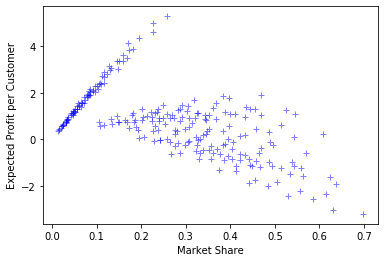

In [25]:
#Plotting market share of candidates and price per customer

plt.plot(Product_df['Brand C'],Product_df['Profit per customer'],'b+', alpha = 0.5)
plt.xlabel('Market Share')
plt.ylabel('Expected Profit per Customer')

In [26]:
#Question 3: Selecting the best product based on maximum profit per customer

In [27]:
Product_df.nlargest(1,'Profit per customer')

,Brand A,Brand B,Brand C,margin,Profit per customer
71,0.309763,0.431397,0.25884,20.4,5.280343


In [28]:
Product_df.nlargest(1,'margin')

,Brand A,Brand B,Brand C,margin,Profit per customer
0,0.44682,0.536649,0.01653,27.0,0.446321


In [29]:
Product_df.nlargest(5,'Brand C')

,Brand A,Brand B,Brand C,margin,Profit per customer
233,0.176061,0.127226,0.696713,-4.6,-3.204878
224,0.205488,0.156325,0.638187,-3.0,-1.914560
242,0.208520,0.160980,0.630500,-4.8,-3.026400
206,0.219095,0.158157,0.622748,-2.6,-1.619145
230,0.227390,0.157481,0.615129,-3.8,-2.337492
